# Stock Prediction Project

## by Zachary Wing

## Walt Disney (DIS)

### Import

In [122]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('DIS.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-04,110.949997,111.250000,109.989998,110.300003,102.801094,5748200
1,2015-06-05,110.300003,110.769997,109.800003,110.300003,102.801094,4323500
2,2015-06-08,110.029999,110.239998,109.209999,109.290001,101.859756,6068100
3,2015-06-09,109.349998,109.410004,107.650002,108.519997,101.142105,7711800
4,2015-06-10,108.900002,110.250000,108.730003,110.000000,102.521477,5128700


Data is last 5 years from 2015-06-03 to 2020-06-02

### Plotting the Figure

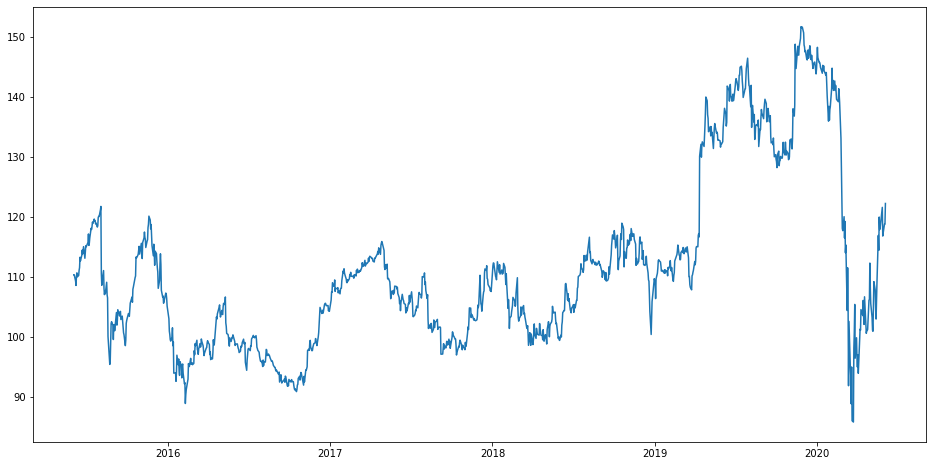

In [123]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

### Creating target variable

In [124]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]



### Split

In [125]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# So I set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:1006]
valid = new_data[1006:]

valid.head()


,Date,Close
1006,2019-06-04 00:00:00,134.82
1007,2019-06-05 00:00:00,135.94
1008,2019-06-06 00:00:00,137.21
1009,2019-06-07 00:00:00,138.04
1010,2019-06-10 00:00:00,137.07


In [126]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 2)

 Shape of training set:
(1006, 2)

 Shape of validation set:
(253, 2)


### Assign Predictions Moving Average

In [127]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/253
    preds.append(b)

In [128]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
23.5523306170752


### Plot with predictions Moving Average

/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


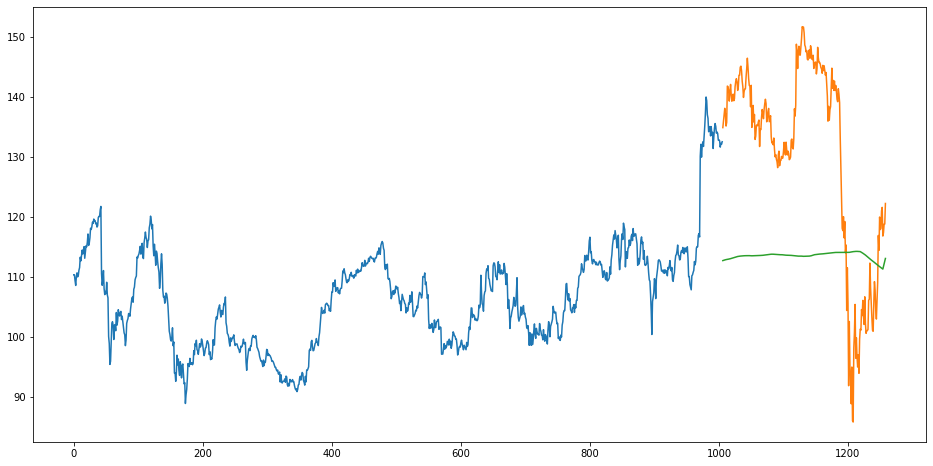

In [129]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

### Linear Regression

In [130]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


#creating a separate dataset
lin_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

#sorting
lin_data = lin_data.sort_index(ascending=True, axis=0)

for i in range(0,len(data)):
    lin_data['Date'][i] = data['Date'][i]
    lin_data['Close'][i] = data['Close'][i]
    
lin_data.head()

,Date,Close
0,2015-06-04 00:00:00,110.3
1,2015-06-05 00:00:00,110.3
2,2015-06-08 00:00:00,109.29
3,2015-06-09 00:00:00,108.52
4,2015-06-10 00:00:00,110


### Create Additional Features

In [131]:
#create features
# ‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, 
# ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’




lin_data['Year']=0
lin_data['Month']=0
lin_data['Week']=0
lin_data['Day']=0
lin_data['Dayofweek']=0
lin_data['Dayofyear']=0

lin_data['Is_month_end']=0
lin_data['Is_month_start']=0
lin_data['Is_quarter_end']=0
lin_data['Is_quarter_start']=0
lin_data['Is_year_end']=0
lin_data['Is_year_start']=0
lin_data['mon_fri']=0




#lin_data['Month'] = lin_data.Date.astype('datetime64[%M]')
#lin_data['Week'] = lin_data.Date.astype('datetime64[%W]')

for i in range(0,len(lin_data)):
    lin_data['Year'][i]=int(lin_data['Date'][i].year)
    lin_data['Month'][i]=int(lin_data['Date'][i].month)
    lin_data['Week'][i]=int(lin_data['Date'][i].strftime('%U'))+1  #first week is 1
    lin_data['Day'][i]=int(lin_data['Date'][i].day)
    lin_data['Dayofweek'][i]=int(lin_data['Date'][i].strftime('%w'))+1 #week start on sunday with Monday = 2
    lin_data['Dayofyear'][i]=int(lin_data['Date'][i].strftime('%j'))
    
    if(lin_data['Day'][i]==1):
        lin_data['Is_month_start'][i]=1
          
    
    if(lin_data['Month'][i]==2): # Feb
        if(lin_data['Day'][i]==29): #2016 and 2020
            lin_data['Is_month_end'][i]=1
        if(lin_data['Day'][i]==28): #2016 and 2020 are leap years so not these ones
            if(lin_data['Year'][i]!=2016):
                if(lin_data['Year'][i]!=2020):
                    lin_data['Is_month_end'][i]=1
                    
    if(lin_data['Day'][i]==31):
        lin_data['Is_month_end'][i]=1
        
    
    if(lin_data['Day'][i]==30):
        # Apr Jun Sep Nov
        if(lin_data['Month'][i]== 4):
            lin_data['Is_month_end'][i]=1
        if(lin_data['Month'][i]== 6):
            lin_data['Is_month_end'][i]=1
        if(lin_data['Month'][i]== 9):
            lin_data['Is_month_end'][i]=1
        if(lin_data['Month'][i]== 11):
            lin_data['Is_month_end'][i]=1
    
#Quarter 1 (Q1): January 1 - March 31.
#Quarter 2 (Q2): April 1 - June 30.
#Quarter 3 (Q3): July 1 - September 30.
#Quarter 4 (Q4): October 1 - December 31.
    
    if(lin_data['Day'][i]==1):
        if(lin_data['Month'][i]== 1):
            lin_data['Is_quarter_start'][i]=1
        if(lin_data['Month'][i]== 4):
            lin_data['Is_quarter_start'][i]=1
        if(lin_data['Month'][i]== 7):
            lin_data['Is_quarter_start'][i]=1
        if(lin_data['Month'][i]== 10):
            lin_data['Is_quarter_start'][i]=1
            
            
            
    if(lin_data['Day'][i]==31):
        if(lin_data['Month'][i]== 3):
            lin_data['Is_quarter_end'][i]=1
        if(lin_data['Month'][i]== 12):
            lin_data['Is_quarter_end'][i]=1
            
    if(lin_data['Day'][i]==30):
        if(lin_data['Month'][i]== 6):
            lin_data['Is_quarter_end'][i]=1
        if(lin_data['Month'][i]== 9):
            lin_data['Is_quarter_end'][i]=1

    
    
    
    if(lin_data['Dayofyear'][i]==1):
        lin_data['Is_year_start'][i]=1
    
    
    if(lin_data['Dayofyear'][i]==366):
        lin_data['Is_year_end'][i]=1
    
    if(lin_data['Dayofyear'][i]==365):
        if(lin_data['Year'][i]!=2016):
            if(lin_data['Year'][i]!=2020):
                lin_data['Is_year_end'][i]=1
        
 
    if (lin_data['Dayofweek'][i] == 2 or lin_data['Dayofweek'][i] == 6): #If Mon or Fri
        lin_data['mon_fri'][i] = 1
    else:
        lin_data['mon_fri'][i] = 0


        
     





/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zacharywing/opt/anaconda3/lib/python3.7/si

In [132]:
lin_data.head()

,Date,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,2015-06-04 00:00:00,110.3,2015,6,23,4,5,155,0,0,0,0,0,0,0
1,2015-06-05 00:00:00,110.3,2015,6,23,5,6,156,0,0,0,0,0,0,1
2,2015-06-08 00:00:00,109.29,2015,6,24,8,2,159,0,0,0,0,0,0,1
3,2015-06-09 00:00:00,108.52,2015,6,24,9,3,160,0,0,0,0,0,0,0
4,2015-06-10 00:00:00,110,2015,6,24,10,4,161,0,0,0,0,0,0,0


In [133]:
lin_data.tail()

,Date,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
1254,2020-05-28 00:00:00,116.75,2020,5,22,28,5,149,0,0,0,0,0,0,0
1255,2020-05-29 00:00:00,117.3,2020,5,22,29,6,150,0,0,0,0,0,0,1
1256,2020-06-01 00:00:00,118.77,2020,6,23,1,2,153,0,1,0,0,0,0,1
1257,2020-06-02 00:00:00,118.75,2020,6,23,2,3,154,0,0,0,0,0,0,0
1258,2020-06-03 00:00:00,122.18,2020,6,23,3,4,155,0,0,0,0,0,0,0


### Split

In [134]:
lin_data.index = lin_data['Date']

#split into train and validation
lin_train = lin_data[:1006]
lin_valid = lin_data[1006:]

lin_x_train = lin_train.drop('Close', axis=1)
lin_x_train = lin_x_train.drop('Date', axis=1)
lin_y_train = lin_train['Close']
lin_x_valid = lin_valid.drop('Close', axis=1)
lin_x_valid = lin_x_valid.drop('Date', axis=1)
lin_y_valid = lin_valid['Close']

In [135]:
lin_x_train.head()

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
Date,,,,,,,,,,,,,
2015-06-04,2015,6,23,4,5,155,0,0,0,0,0,0,0
2015-06-05,2015,6,23,5,6,156,0,0,0,0,0,0,1
2015-06-08,2015,6,24,8,2,159,0,0,0,0,0,0,1
2015-06-09,2015,6,24,9,3,160,0,0,0,0,0,0,0
2015-06-10,2015,6,24,10,4,161,0,0,0,0,0,0,0


In [136]:
lin_y_train.head()

Date
2015-06-04     110.3
2015-06-05     110.3
2015-06-08    109.29
2015-06-09    108.52
2015-06-10       110
Name: Close, dtype: object

In [137]:
#implement linear regression    
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(lin_x_train,lin_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
#make predictions and find the rmse
preds = model.predict(lin_x_valid)
rms=np.sqrt(np.mean(np.power((np.array(lin_y_valid)-np.array(preds)),2)))
rms

24.666871858479688

/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


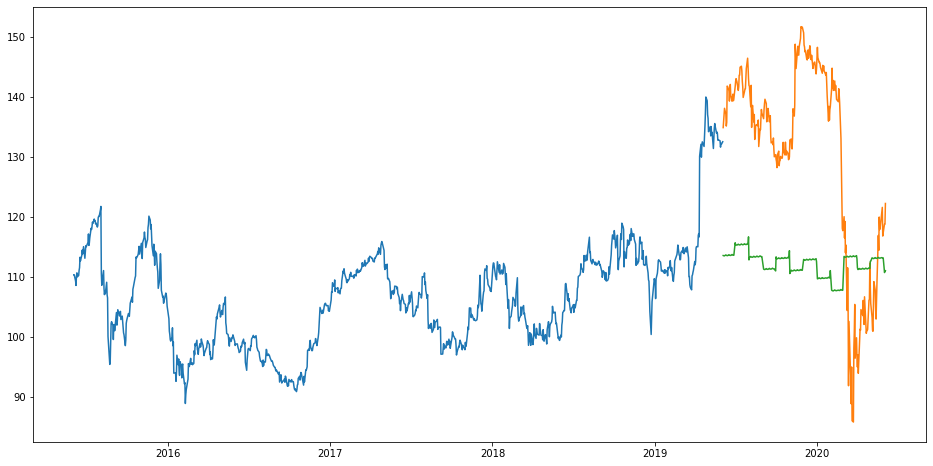

In [139]:
#plot
lin_valid['Predictions'] = 0
lin_valid['Predictions'] = preds

#lin_valid.head()
#lin_valid.index = lin_data[:1006].index
#lin_train.index = lin_data[1006:].index

plt.figure(figsize=(16,8))
plt.plot(lin_train['Close'])
plt.plot(lin_valid[['Close', 'Predictions']])

### Long Short Term Memory (LSTM)

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

The input gate: The input gate adds information to the cell state
The forget gate: It removes the information that is no longer required by the model
The output gate: Output Gate at LSTM selects the information to be shown as output




In [140]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [141]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1006,:]
valid = dataset[1006:,:]


In [142]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [143]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 76s - loss: 0.0027


In [144]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

4.966597792504967

/Users/zacharywing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


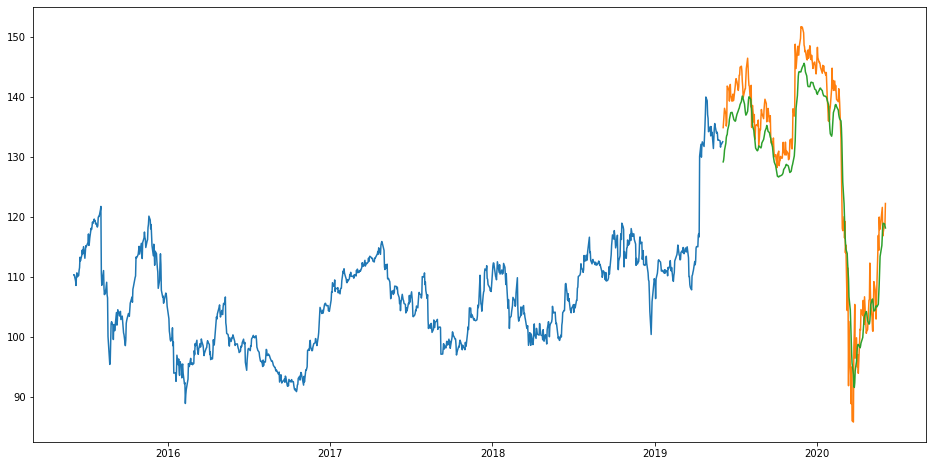

In [145]:
#for plotting
train = new_data[:1006]
valid = new_data[1006:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [146]:
train.head()

,Close
Date,
2015-06-04,110.3
2015-06-05,110.3
2015-06-08,109.29
2015-06-09,108.52
2015-06-10,110


In [147]:
valid.head()

,Close,Predictions
Date,,
2019-06-04,134.82,129.112610
2019-06-05,135.94,129.407425
2019-06-06,137.21,130.080124
2019-06-07,138.04,131.067993
2019-06-10,137.07,132.219376


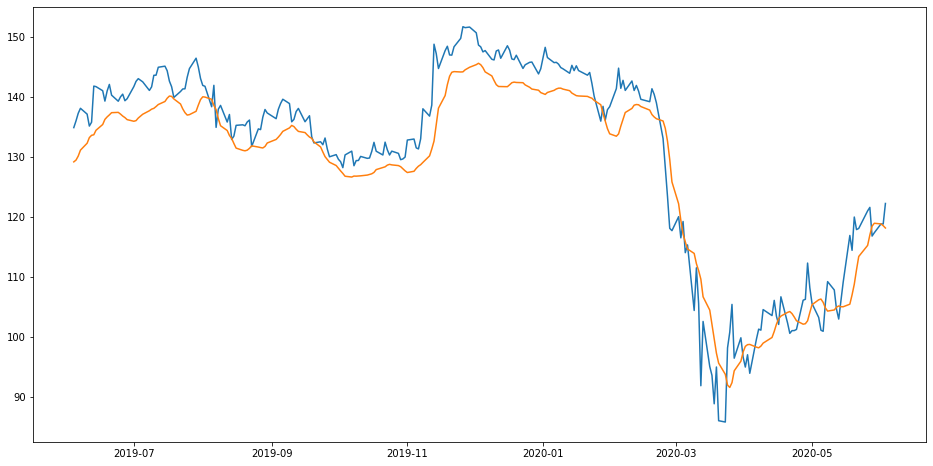

In [148]:
plt.figure(figsize=(16,8))
plt.plot(valid[['Close','Predictions']])

In [149]:
valid.to_csv('prediction.csv')

In [150]:
valid[['Predictions']].head()

,Predictions
Date,
2019-06-04,129.112610
2019-06-05,129.407425
2019-06-06,130.080124
2019-06-07,131.067993
2019-06-10,132.219376


In [151]:
valid[['Predictions']].max()


Predictions    145.540268
dtype: float32

In [152]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2019-12-03  148.58   145.540268


In [153]:
valid[['Predictions']].idxmax()

Predictions   2019-12-03
dtype: datetime64[ns]

In [154]:
valid_sub = valid.loc['2019-11-25':'2019-12-10']

In [155]:
valid_sub

,Close,Predictions
Date,,
2019-11-25,149.69,144.092072
2019-11-26,151.64,144.113007
2019-11-27,151.48,144.451538
2019-11-29,151.58,144.878281
2019-12-02,150.62,145.314148
2019-12-03,148.58,145.540268
2019-12-04,148.28,145.305389
2019-12-05,147.44,144.810410
2019-12-06,147.66,144.108322


In [156]:
train.tail()

,Close
Date,
2019-05-28,132.62
2019-05-29,131.57
2019-05-30,132.2
2019-05-31,132.04
2019-06-03,132.47


In [157]:
final_valid = valid_sub[['Predictions']]
final_valid.columns = ['Value']
#final_valid = final_valid.loc['2019-12-03']
final_valid = final_valid.sort_values(by='Value', ascending=False)
final_valid = final_valid[:1]

final = train
final.columns = ['Value']
#final = final.loc['2019-06-03']
final = final[-1:]

final_valid.head()

,Value
Date,
2019-12-03,145.540268


In [158]:
final.head()
result = final.append(final_valid)





In [159]:
#frames = [final, final_valid]
#result = pd.concat(frames)

In [160]:
result

,Value
Date,
2019-06-03,132.47
2019-12-03,145.54


In [161]:
#result.to_frame()

In [162]:
#idx = 0
#new_col = ['2019-06-03','2019-12-03']  # can be a list, a Series, an array or a scalar   
#result.insert(loc=idx, column='Date', value=new_col)

In [163]:
result.to_csv('result.csv')

In [164]:
bvalue = result.Value[0]
evalue = result.Value[1]
pps = evalue-bvalue
roi = pps/bvalue
roip = roi*100
roip =round(roip,2)

print('Begin Value: '+str(bvalue))
print('End Value: '+str(evalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roi))
print('Return on Investment: '+str(roip)+'%')

Begin Value: 132.470001
End Value: 145.54026794433594
Profit per Share: 13.070266944335941
Return on Investment: 0.09866586280418267
Return on Investment: 9.87%
